# Import Libraries

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [21]:
url = 'CustomerSegmentation/Mall_Customers.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Processing

In [22]:
# Data processing: select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Implement K-Means Clustering

In [23]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Print Cluster Centers

In [24]:
print("Cluster centers:")
print(kmeans.cluster_centers_)

Cluster centers:
[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


# Visualize the Clusters

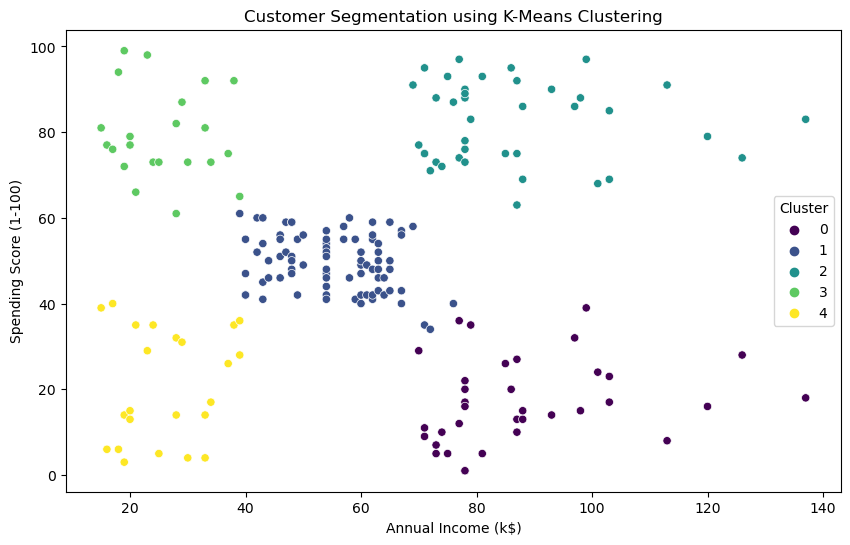

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Save Results to CSV

In [26]:
df.to_csv('customer_segments.csv', index=False)

# Generate a Concise Report

In [27]:
report = df.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).rename(columns={'CustomerID': 'Number of Customers'}).reset_index()

print("Customer Segmentation Report:")
print(report)

Customer Segmentation Report:
   Cluster  Number of Customers  Annual Income (k$)  Spending Score (1-100)
0        0                   35           88.200000               17.114286
1        1                   81           55.296296               49.518519
2        2                   39           86.538462               82.128205
3        3                   22           25.727273               79.363636
4        4                   23           26.304348               20.913043
